>## **Task Title:** Customer Churn Prediction for a Bank ##

Importing the libraries for the task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score, jaccard_score, log_loss
import itertools
import seaborn as sns

Load the data from the CSV File

In [2]:
Data = pd.read_csv('Churn_Modelling.csv')

Get data characteristics to better train our model for more accurate results

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
Data.duplicated().sum()

0

In [5]:
Data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
Data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

I have noticed that the churn column has been labeled as 'Exited'. Now for me that seems a little confusing and misguiding for both me and any layman reader so I am going to remove that column.

In [7]:
Data['Churn'] = Data['Exited']
Data.drop(['Exited'], axis=1, inplace=True)

Lets see if that worked

In [8]:
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Perfect!

In [9]:
Data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Now we will visualise our data to better understand it.


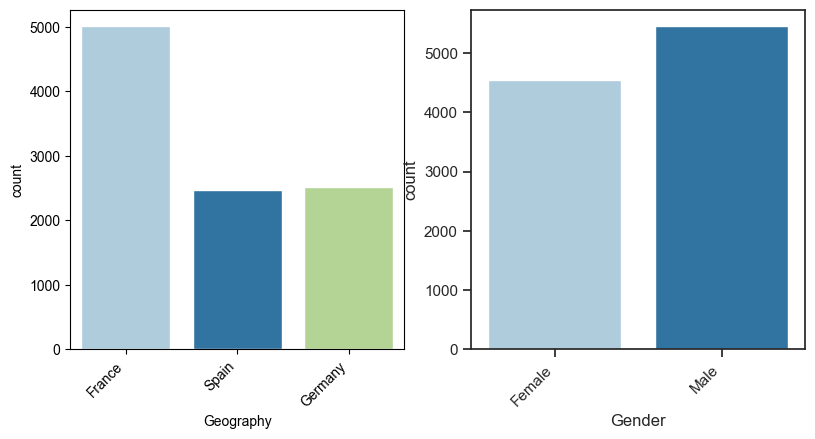

In [10]:
categorical_features = Data.select_dtypes(include=[object]).columns[Data.select_dtypes(include=[object]).columns != 'Surname']

plt.figure(figsize = (25,15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3,5,i + 1)
    sns.set(palette='Paired')
    sns.set_style("ticks")
    ax = sns.countplot(x = feature, data = Data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

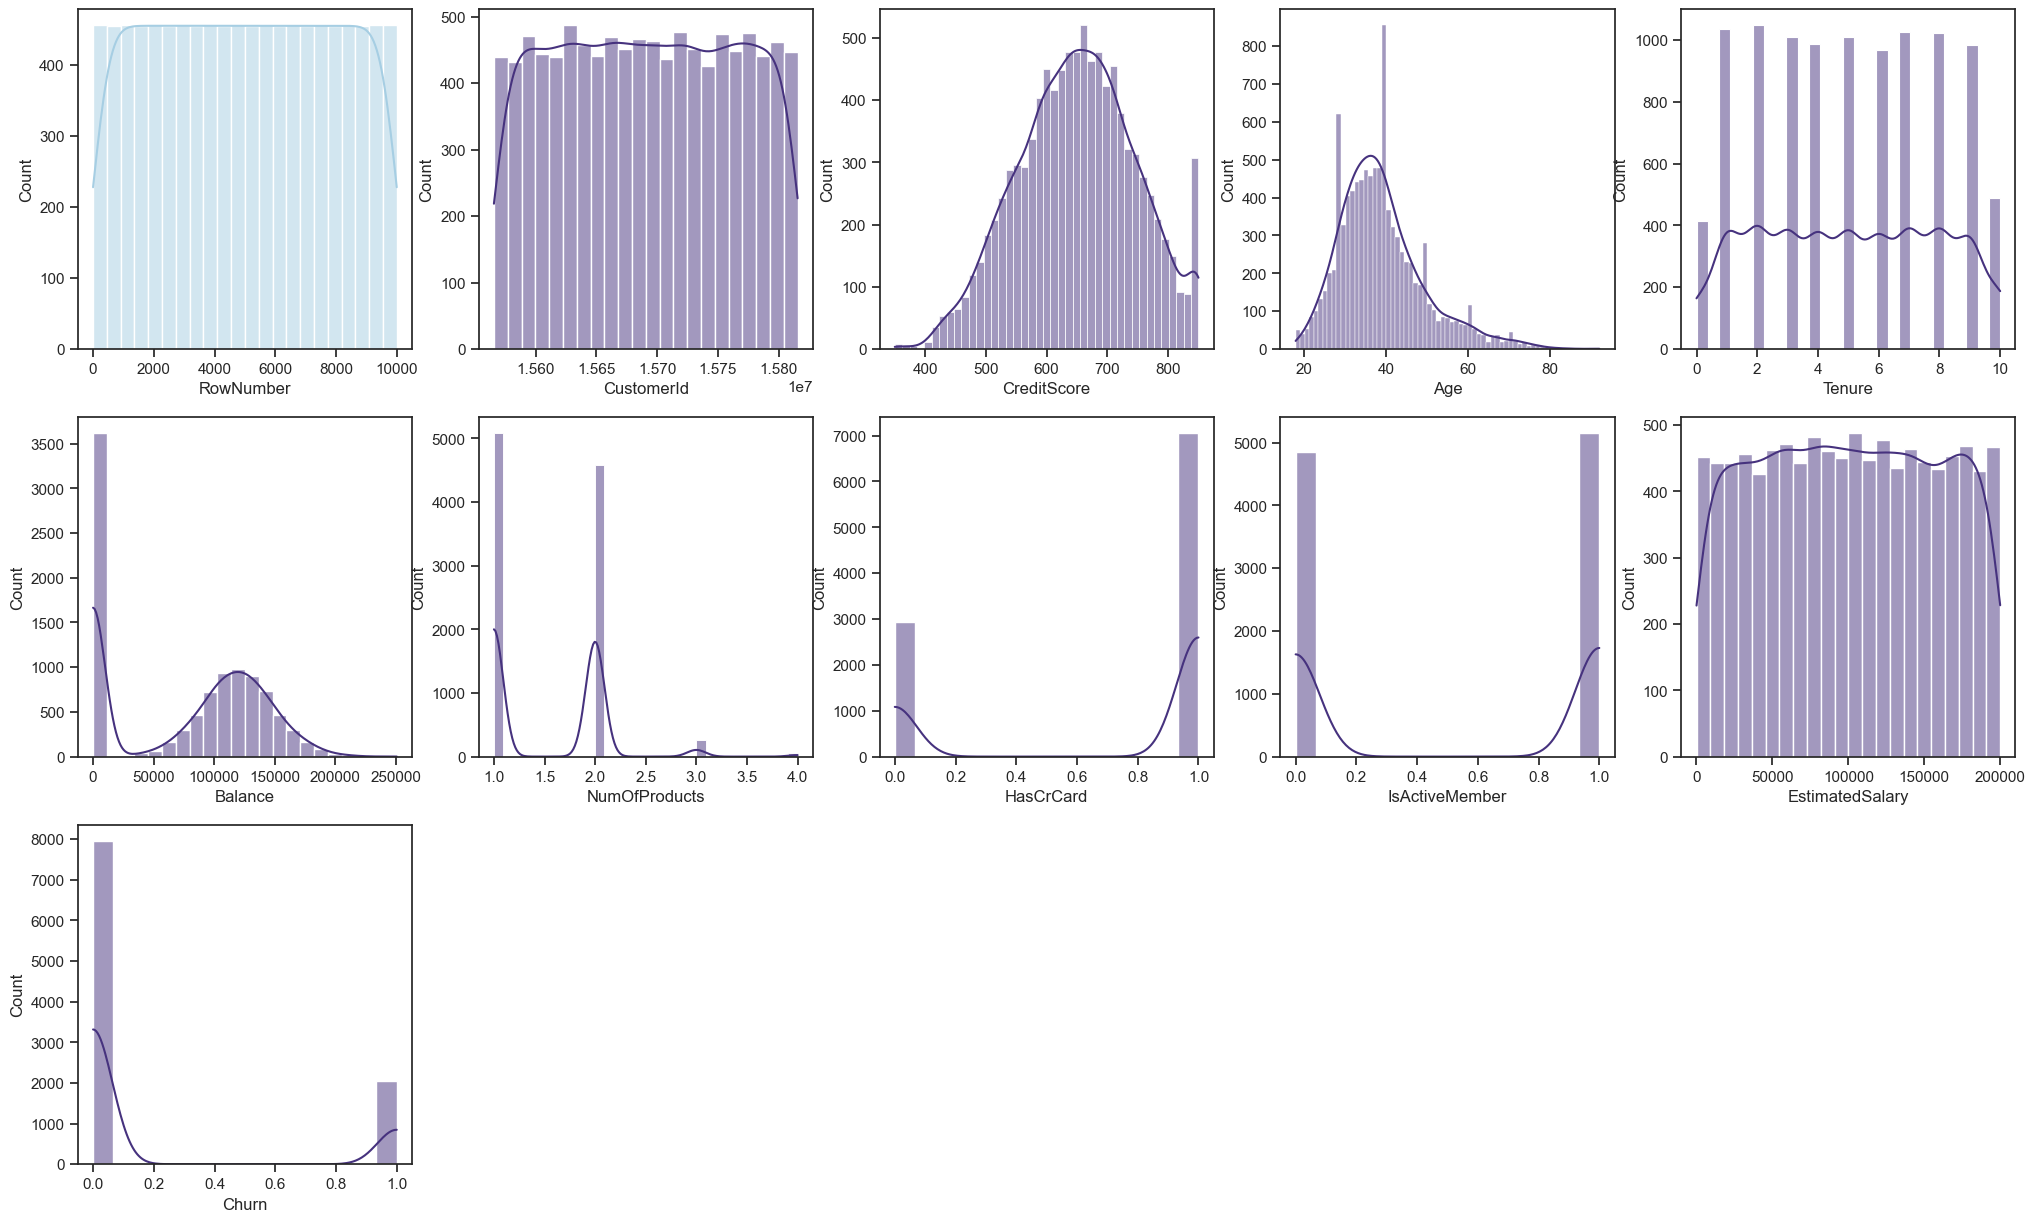

In [11]:
# Assuming Data is your dataset
numeric_features = Data.select_dtypes(include=[np.number])

# Calculate the number of rows and columns for subplots
num_features = numeric_features.shape[1]
num_rows = (num_features - 1) // 5 + 1
num_cols = min(num_features, 5)

plt.figure(figsize=(25, 5 * num_rows))
for i, feature in enumerate(numeric_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.set(palette='viridis')
    sns.set_style("ticks")
    sns.histplot(Data[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")

For further operations, such as data normalization etc., we need to convert the data into a numpy array.

In [12]:
# Select all int64 columns except for the 'Churn' column
cols = Data.select_dtypes(include=['int64']).columns[Data.select_dtypes(include=['int64']).columns != 'Churn']
# Create a new DataFrame with the selected columns
X = np.asarray(Data[cols])
# Display the first 5 rows of the new DataFrame
X[0:5]


array([[       1, 15634602,      619,       42,        2,        1,
               1,        1],
       [       2, 15647311,      608,       41,        1,        1,
               0,        1],
       [       3, 15619304,      502,       42,        8,        3,
               1,        0],
       [       4, 15701354,      699,       39,        1,        2,
               0,        0],
       [       5, 15737888,      850,       43,        2,        1,
               1,        1]], dtype=int64)

In [13]:
y = np.asarray(Data['Churn'])
y [0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.73187761, -0.78321342, -0.32622142,  0.29351742, -1.04175968,
        -0.91158349,  0.64609167,  0.97024255],
       [-1.7315312 , -0.60653412, -0.44003595,  0.19816383, -1.38753759,
        -0.91158349, -1.54776799,  0.97024255],
       [-1.73118479, -0.99588476, -1.53679418,  0.29351742,  1.03290776,
         2.52705662,  0.64609167, -1.03067011],
       [-1.73083838,  0.14476652,  0.50152063,  0.00745665, -1.38753759,
         0.80773656, -1.54776799, -1.03067011],
       [-1.73049197,  0.65265871,  2.06388377,  0.38887101, -1.04175968,
        -0.91158349,  0.64609167,  0.97024255]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 8) (8000,)
Test set: (2000, 8) (2000,)


So the data has a 80/20 split now. 80% of the data is in the training set and 20% of the data is in the test set. Now we will create a logistic regression model and train it on the training set. We will name our model 'LogRes'.

In [16]:
LogRes = LogisticRegression(C = 0.1, solver='liblinear').fit(X_train,y_train)
LogRes

LogisticRegression(C=0.1, solver='liblinear')

In [17]:
yhat = LogRes.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Now we have obtained the data into fine groups but we also need to find the probability of each possibility of the data. For this we will use the function below.

In [18]:
yhat_prob = LogRes.predict_proba(X_test)
yhat_prob

array([[0.89185868, 0.10814132],
       [0.7369563 , 0.2630437 ],
       [0.92860437, 0.07139563],
       ...,
       [0.73854618, 0.26145382],
       [0.82689892, 0.17310108],
       [0.86627779, 0.13372221]])

In [19]:
jaccard_score(y_test, yhat, pos_label=0)

0.8066666666666666

We have got a 80% accuracy on the test set. This is a good accuracy. However, it can be better.

In [20]:
def Confusion_Matrix(ConfMat, Categories, normalize=False, title = 'Churn Prediction Confusion Matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """    
    if normalize:
        ConfMat = ConfMat.astype('float') / ConfMat.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix Without Normalization')
    print(ConfMat)
    
    plt.imshow(ConfMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(Categories))
    plt.xticks(tick_marks, Categories, rotation=45)
    plt.yticks(tick_marks, Categories)

    fmt = '.2f' if normalize else 'd'
    threshold = ConfMat.max() / 2.
    for i, j in itertools.product(range(ConfMat.shape[0]), range(ConfMat.shape[1])):
        plt.text(j, i, format(ConfMat[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if ConfMat[i, j] > threshold else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Path: Customer Churn Prediction.ipynb
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  50  346]
 [  31 1573]]


In [21]:
Conf_Matrix = confusion_matrix(y_test, yhat, labels=[1,0])
print(Conf_Matrix)

[[  50  346]
 [  31 1573]]


In [22]:
np.set_printoptions(precision=3, suppress=True)

We will now obtain a Confusion Matrix below which is a classification of our predictions into a table. The columns represent the predicted labels and the rows represent the actual labels. The cells represent the number of predictions made by the model. The diagonal cells represent the number of correct predictions made by the model. The off-diagonal cells represent the number of incorrect predictions made by the model. The Confusion Matrix is a great way to visualize the performance of our model. 

Confusion Matrix Without Normalization
[[  50  346]
 [  31 1573]]


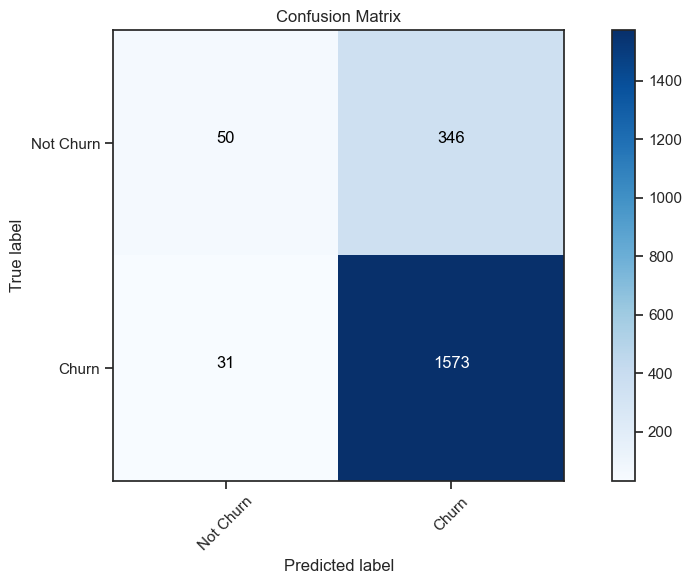

In [23]:
plt.figure(figsize=(10, 6))
Confusion_Matrix(Conf_Matrix, Categories= ['Not Churn', 'Churn'],normalize= False , title='Confusion Matrix', cmap='Blues')

In [24]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1604
           1       0.62      0.13      0.21       396

    accuracy                           0.81      2000
   macro avg       0.72      0.55      0.55      2000
weighted avg       0.78      0.81      0.76      2000



In [25]:
log_loss(y_test, yhat_prob)

0.4386196611392611

In [26]:
accuracy_score(y_test, yhat)

0.8115

A slight improvement from our previous result of 80%. Lets try another algorithm.

>## **Algorithm:** Random Forest ##

Now, as per our instructions, we also have the liberty to run the Random Forest algorithm on our data.

In [27]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, auc, roc_curve, precision_score, recall_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

As you can see, the starting steps of libraries importing and train/test data splitting are the same. The only difference that you might notice is that we have imported the 'RandomForestClassifier' unlike the previous model in which we imported 'LogisticRegression' from the linear_model library of sklearn. 

In [29]:
rf_classifier = RandomForestClassifier(random_state=42)

We will now test our models accuracy.

In [30]:
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 100.0%
Test Accuracy: 86.15%


Already, the model is much better than the final result we got from the logistic regression model. This seems promising. 

Confusion Matrix:


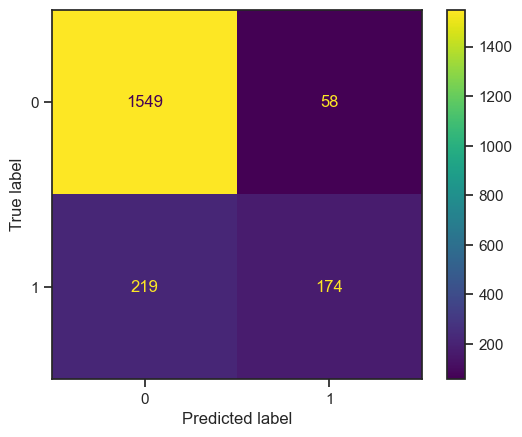

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Log Loss:  0.41215324172510215


In [31]:
c_matrix = confusion_matrix(y_test, y_pred)

c_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

c_matrix_display.plot()
print("Confusion Matrix:")
plt.show()

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

yhat_prob = rf_classifier.predict_proba(X_test)
yhat_prob

print("Log Loss: ", log_loss(y_test, yhat_prob))

> ## **SMOTED Version of Algorithm:** Random Forest ##

Now, a way that we can modify our Random Forest model is to using the function SMOTE. It is used to perform a balance class distribution on an otherwise imbalanced dataset. It is an oversampling method that creates synthetic samples from the minor class. This is done by selecting similar records and altering that records one by one to create a new synthetic record. This is done until the number of records in both classes is equal.

In [32]:
oversample = SMOTE(k_neighbors=55, random_state=42)
X_features_smoted, y_target_smoted = oversample.fit_resample(X, y)
y_target_smoted = pd.Series(y_target_smoted)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 100.0%
Test Accuracy: 86.91%


We have increased our accuracy from 85% to almost 87% after using the SMOTE technique.

Confusion Matrix:


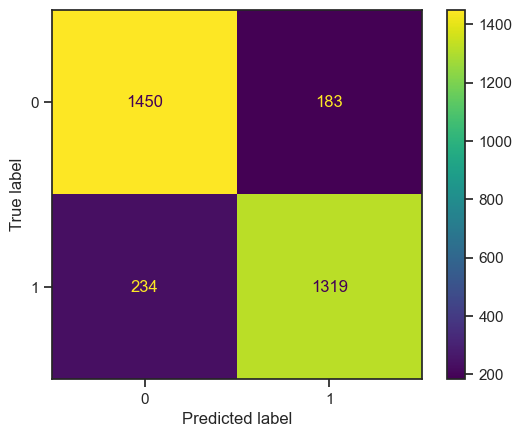

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1633
           1       0.88      0.85      0.86      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186

Log Loss:  0.7666645884787358


In [35]:
c_matrix = confusion_matrix(y_test, y_pred)

c_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

c_matrix_display.plot()
print("Confusion Matrix:")
plt.show()

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

yhat_prob = LogRes.predict_proba(X_test)
yhat_prob

print("Log Loss: ", log_loss(y_test, yhat_prob))

We are satisfied that this is the highest accuracy that can be achieved by this method. We will now try to improve the accuracy by using other methods.

>## **Algorithm:** Gradient Boosting ##

A final algorithm that we would use is the Gradient Boosting.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score, jaccard_score, log_loss
import itertools
import seaborn as sns

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 8) (8000,)
Test set: (2000, 8) (2000,)


We will create a model, same as before.

In [38]:
GradBoost = GradientBoostingClassifier(n_estimators=100).fit(X_train,y_train)
GradBoost

GradientBoostingClassifier()

In [39]:
yhat = GradBoost.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [40]:
yhat_prob = GradBoost.predict_proba(X_test)
yhat_prob

array([[0.89 , 0.11 ],
       [0.916, 0.084],
       [0.968, 0.032],
       ...,
       [0.804, 0.196],
       [0.023, 0.977],
       [0.954, 0.046]])

In [41]:
jaccard_score(y_test, yhat, pos_label=0)

0.8526663001649258

Our jaccard score shows that our model is 84% accurate/similar to the actual data. This is a good score, but we can do better. We will try to improve our model.

In [42]:
def Confusion_Matrix(ConfMat, Categories, normalize=False, title = 'Churn Prediction Confusion Matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """    
    if normalize:
        ConfMat = ConfMat.astype('float') / ConfMat.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix Without Normalization')
    print(ConfMat)

    plt.imshow(ConfMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(Categories))
    plt.xticks(tick_marks, Categories, rotation=45)
    plt.yticks(tick_marks, Categories)

    fmt = '.2f' if normalize else 'd'
    threshold = ConfMat.max() / 2.
    for i, j in itertools.product(range(ConfMat.shape[0]), range(ConfMat.shape[1])):
        plt.text(j, i, format(ConfMat[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if ConfMat[i, j] > threshold else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [43]:
# Path: Customer Churn Prediction.ipynb
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 181  215]
 [  53 1551]]


In [44]:
Conf_Matrix = confusion_matrix(y_test, yhat, labels=[1,0])
print(Conf_Matrix)

[[ 181  215]
 [  53 1551]]


In [45]:
np.set_printoptions(precision=3, suppress=True)

Confusion Matrix Without Normalization
[[ 181  215]
 [  53 1551]]


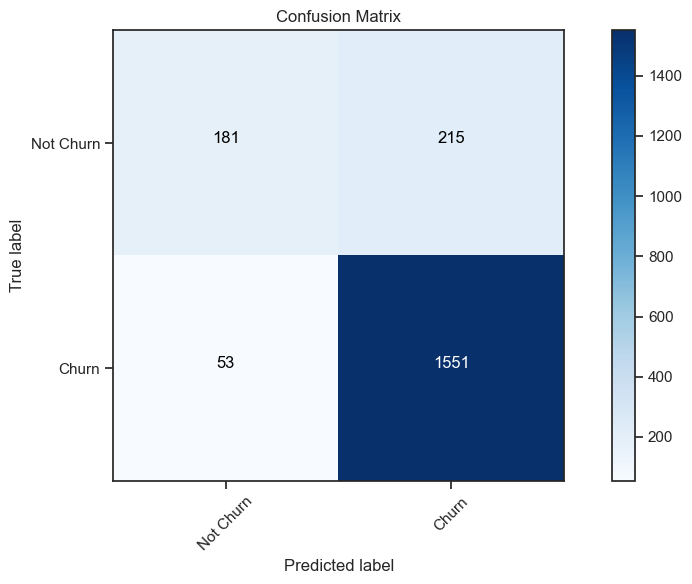

In [46]:
plt.figure(figsize=(10, 6))
Confusion_Matrix(Conf_Matrix, Categories= ['Not Churn', 'Churn'],normalize= False , title='Confusion Matrix', cmap='Blues')

In [47]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1604
           1       0.77      0.46      0.57       396

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [48]:
log_loss(y_test,yhat_prob)

0.34300451502713625

So we have achieved about 87% accuracy from our Gradient Boost Classifier model. 

>## **Algorithm Comparision:**

We will now compare our Algorithms to see which one gave us the best answer.

In [49]:
Algo_List = [LogRes, rf_classifier, GradBoost]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
Algo_columns = []
Algo_compare = pd.DataFrame(columns = Algo_columns)


row_index = 0

for alg in Algo_List:
    predicted = alg.fit(X_train_scaled, y_train).predict(X_test_scaled)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    Algo_compare.loc[row_index,'Algorithm Name'] = MLA_name
    Algo_compare.loc[row_index, 'Algorithm Train Accuracy'] = round(alg.score(X_train_scaled, y_train), 4) * 100
    Algo_compare.loc[row_index, 'Algorithm Test Accuracy'] = round(alg.score(X_test_scaled, y_test), 4) * 100
    Algo_compare.loc[row_index, 'Algorithm Precision'] = round(precision_score(y_test, predicted), 4) * 100
    Algo_compare.loc[row_index, 'Algorithm Recall'] = round(recall_score(y_test, predicted), 4) * 100
    Algo_compare.loc[row_index, 'Algorithm AUC'] = round(auc(fp, tp), 4) * 100
    row_index+=1

In [52]:
Algo_compare.sort_values(by = ['Algorithm Train Accuracy'], ascending = False, inplace = True)
Algo_compare

,Algorithm Name,Algorithm Train Accuracy,Algorithm Test Accuracy,Algorithm Precision,Algorithm Recall,Algorithm AUC
1,RandomForestClassifier,100.00,86.91,87.82,84.93,86.86
2,GradientBoostingClassifier,88.01,88.04,89.12,85.96,87.99
0,LogisticRegression,69.69,69.55,68.65,69.09,69.54


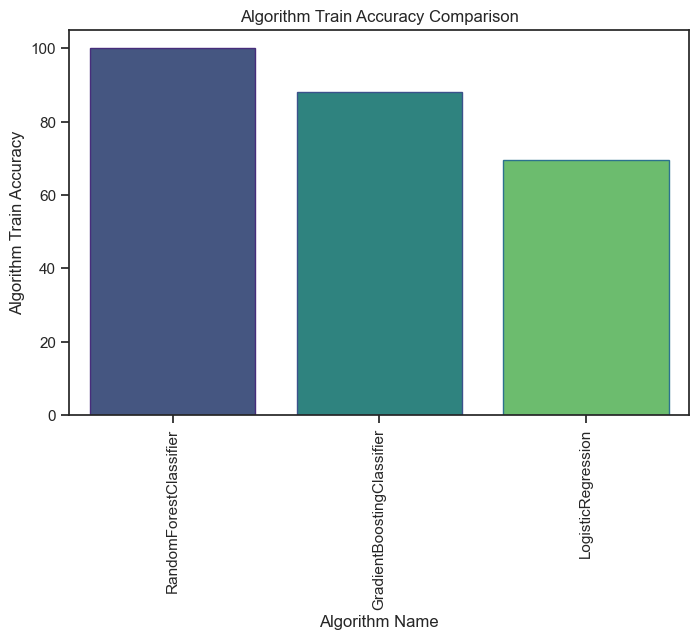

In [53]:
plt.subplots(figsize=(8,5))
sns.barplot(x="Algorithm Name", y="Algorithm Train Accuracy",data=Algo_compare,palette='viridis',edgecolor=sns.color_palette('viridis',7))
plt.xticks(rotation=90)
plt.title('Algorithm Train Accuracy Comparison')
plt.show()

Based on our results, we are able to affirm that despite RandomForestClassifier having the best training accuracy out of all three, it has become overfitted and only has 86% test accuracy. Therefore, based on training and test data accuracy and the confusion matrix, we can conclude that Gradient Boost is the best model for this dataset.